## Import

In [19]:
#custom
from CustomEnv.ExploratoryDataAnalyzer import ExploratoryDataAnalyzer
from CustomEnv.Standardizer import Standardize

#data
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (27, 5)
import seaborn as sns

## Load

In [20]:
dfraw = pd.read_csv(r'..\raw_data\train.csv')
dfraw.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C


## EDA Prior to Preprocess

In [21]:
explore = ExploratoryDataAnalyzer(df=dfraw, predictors=['Sex', 'Age', 'Fare'], target='Survived')

In [22]:
explore.show_blanks()

      Column  Blank Count  Blank Percent
10     Cabin          687             77
5        Age          177             20
11  Embarked            2              0


## Preprocess

In [23]:
class Preprocess:

    def __init__(self, df):
        self.df = df

        #columns
        self.colage = 'Age'
        self.colpassengerid = 'PassengerID'

    def drop_useless_columns(self):
        self.df = self.df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])

    def replace_blanks_with_nan(self):
        self.df.Age = self.df.Age.replace(to_replace='', value=np.nan)
    
    def drop_missing_ages(self):
        self.df = self.df[self.df.Age.notnull()]

    def mean_impute_age(self):
        self.df.Age = self.df.Age.fillna(value=self.df.Age.mean())

    def standardize_survival(self):

        conversion_dict = {
            'died': ['0'],
            'survived': ['1'],
        }
        standardize = Standardize(df=self.df, print_conversions=False)
        standardize.standardize_column_values(conversion_dict=conversion_dict, current_col='Survived', revised_col='Survived_')
        self.df = standardize.df

    def bin_age(self):
        self.df['age_binned'] = pd.cut(self.df.Age.astype(int), bins=6, labels=[0, 1, 2,3,4,5]).astype('int')
        self.df['age_binnedevenly'] = pd.qcut(self.df.Age.astype(float), q=5)

    def run_pipeline(self):
        
        self.drop_useless_columns()

        self.replace_blanks_with_nan()
        self.drop_missing_ages()
        #self.mean_impute_age()

        self.standardize_survival()
        self.bin_age()
        return self.df.head()

preprocess = Preprocess(df=dfraw)
preprocess.run_pipeline()
df_preprocessed = preprocess.df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_,age_binned,age_binnedevenly
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,S,died,1,"(19.0, 25.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,C,survived,2,"(31.8, 41.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,8,S,survived,1,"(25.0, 31.8]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,S,survived,2,"(31.8, 41.0]"
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8,S,died,2,"(31.8, 41.0]"


## Explore

In [24]:
explore = ExploratoryDataAnalyzer(df=df_preprocessed, predictors=['Sex', 'Age', 'Fare'], target='Survived')

### Correlations

In [25]:
df_preprocessed.dtypes

Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                  float64
SibSp                  int64
Parch                  int64
Fare                 float64
Embarked              object
Survived_             object
age_binned             int32
age_binnedevenly    category
dtype: object

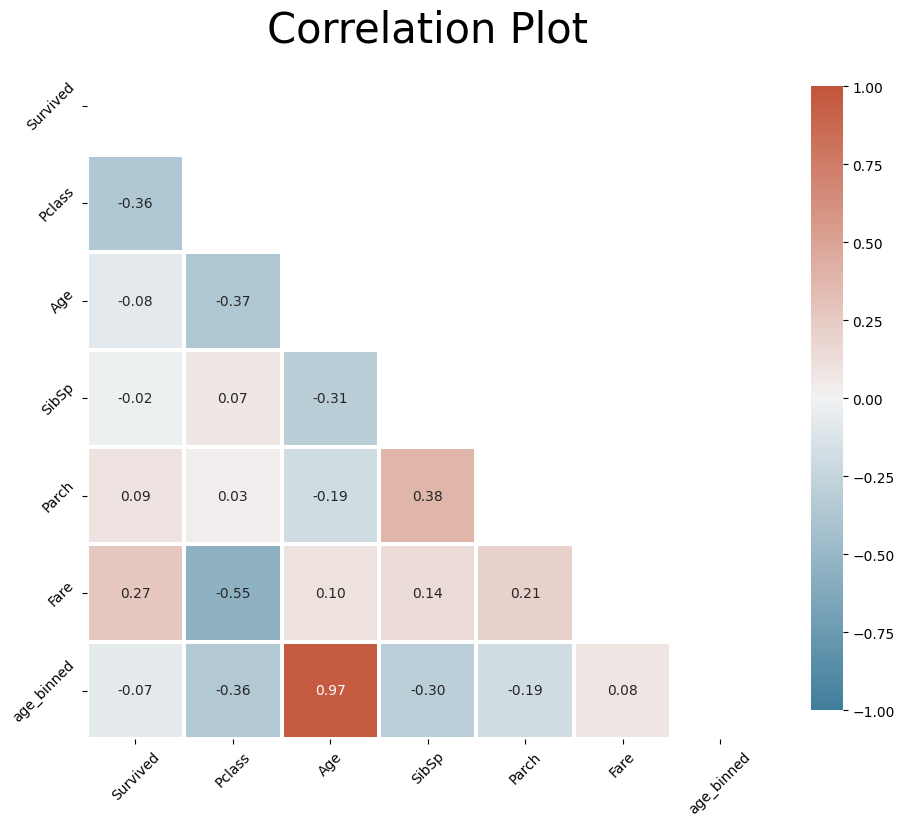

In [26]:
explore.plot_correlation_matrix(numeric_only=True)

### Blanks

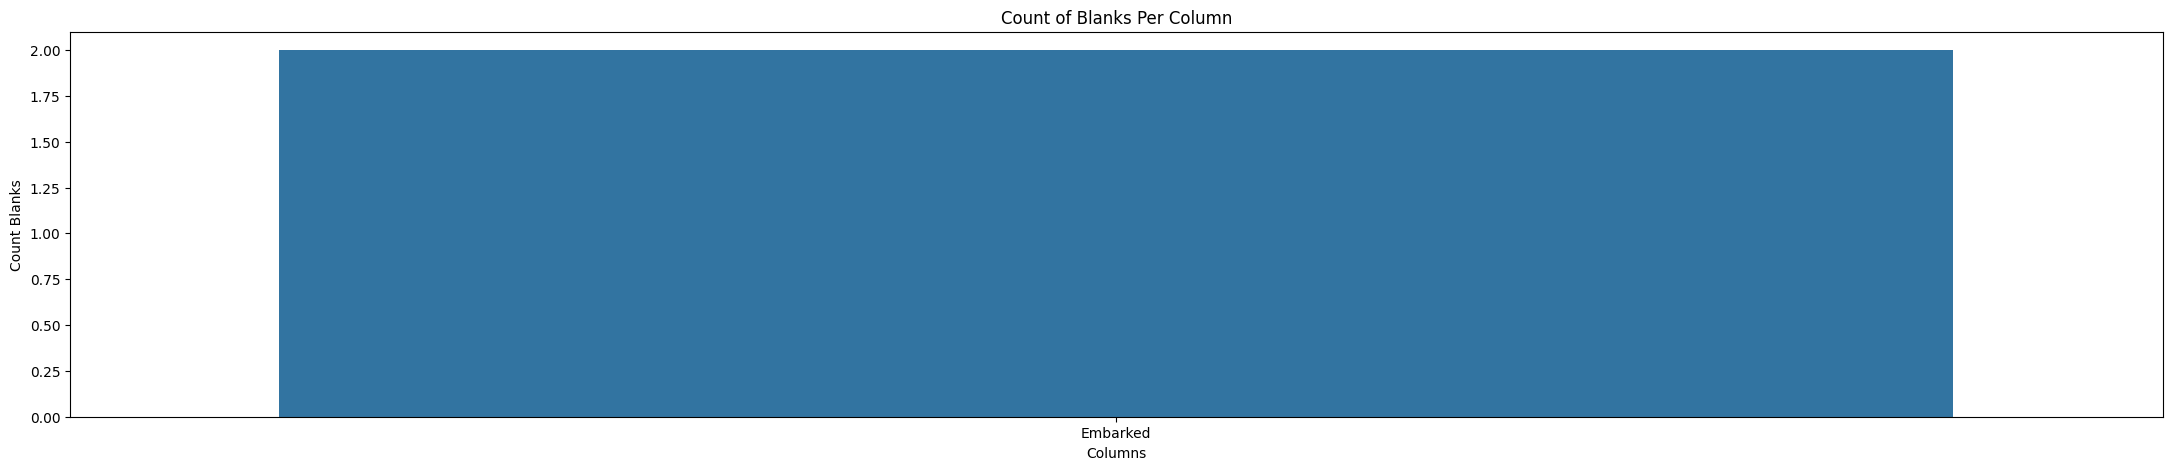

714

In [27]:
explore.plot_blanks_per_column()
len(df_preprocessed)

### Target Balance

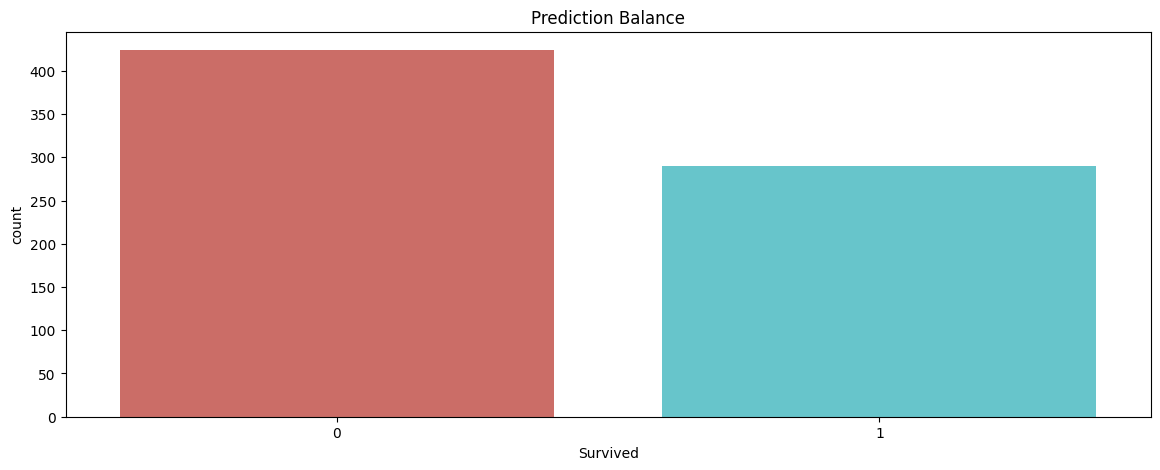

In [28]:
explore.plot_target_balance()

### Grouping Statistics

In [29]:
explore.show_target_grouping_statistics()
eda = dict()
eda['grouping stats'] = 'Age is slightly higher on '

mean stats: 
    Pclass  Age  SibSp  Parch  Fare  age_binned
0       2   31      1      0    23           2
1       2   28      0      1    52           2 

median stats: 
    Pclass  Age  SibSp  Parch  Fare  age_binned
0       3   28      0      0    12           2
1       2   28      0      0    26           2 



### Distributions

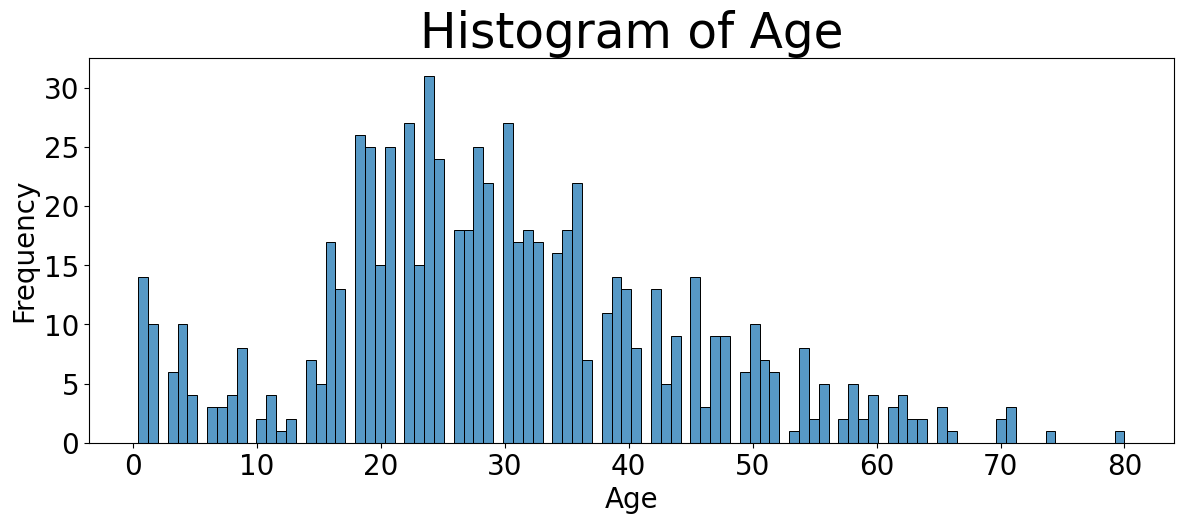

Age Statistics
skew: 0.39
kurtosis: 0.18
mean: 29.7 || median: 28.0 || mode: [24.0]
min: 0.42 || max: 80.0




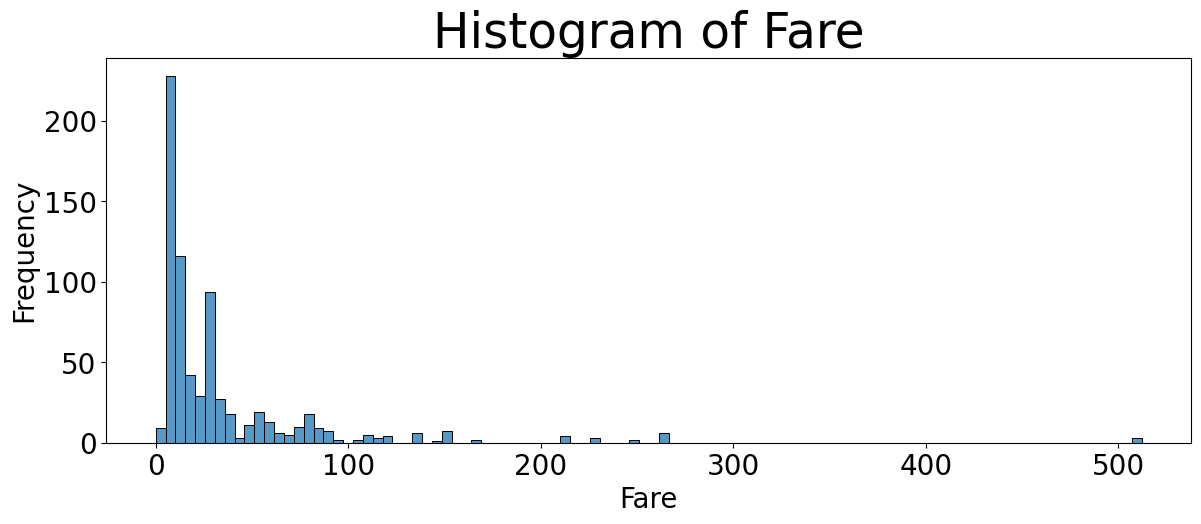

Fare Statistics
skew: 4.65
kurtosis: 30.92
mean: 34.7 || median: 15.7 || mode: [13.0]
min: 0.0 || max: 512.33




In [30]:
explore.plot_distribution(of_columns=['Age', 'Fare'])

explore.plot_n_lowest_and_highest_category_against_target(category='Age', n=5)

### Show Proportions

In [31]:
dfproportions = explore.show_proportions(col='Age', verbose=False)
dfproportions.head(10)

,Count,Percent,Cumulative %
24,30,4,4
22,27,4,8
18,26,4,12
19,25,4,15
28,25,4,19
30,25,4,22
21,24,3,25
25,23,3,29
36,22,3,32
29,20,3,35


In [32]:
dfproportions = explore.show_proportions(col='age_binned', verbose=False)
dfproportions.head(10)

,Count,Percent,Cumulative %
1,248,35,35
2,247,35,69
3,98,14,83
0,71,10,93
4,43,6,99
5,7,1,100


In [33]:
#explore.multi_ecdf(series_to_compute=)

In [34]:
#explore.plot_categorical_outlier_impact_on_target_variable()

### Who Survived

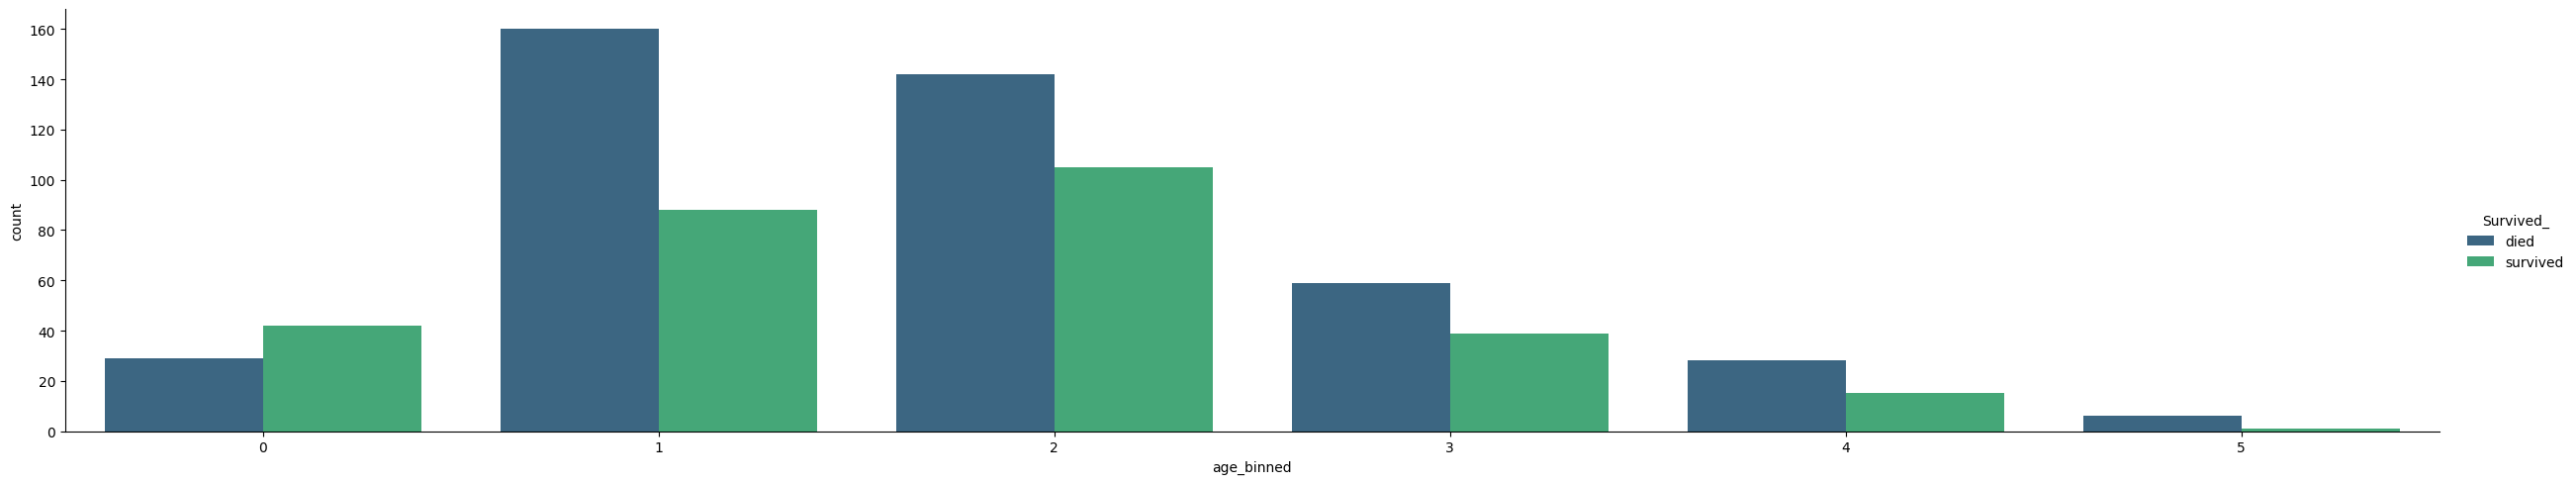

In [35]:
def group_by_age_and_surivival(df):
    #nipy_spectral, prism_r, seismic_r, viridis, winter
    sns.catplot(data=df, x='age_binned', hue='Survived_', palette='viridis', kind='count', height=5, aspect=5)
    plt.show()
    print()
group_by_age_and_surivival(df_preprocessed)

### Additional

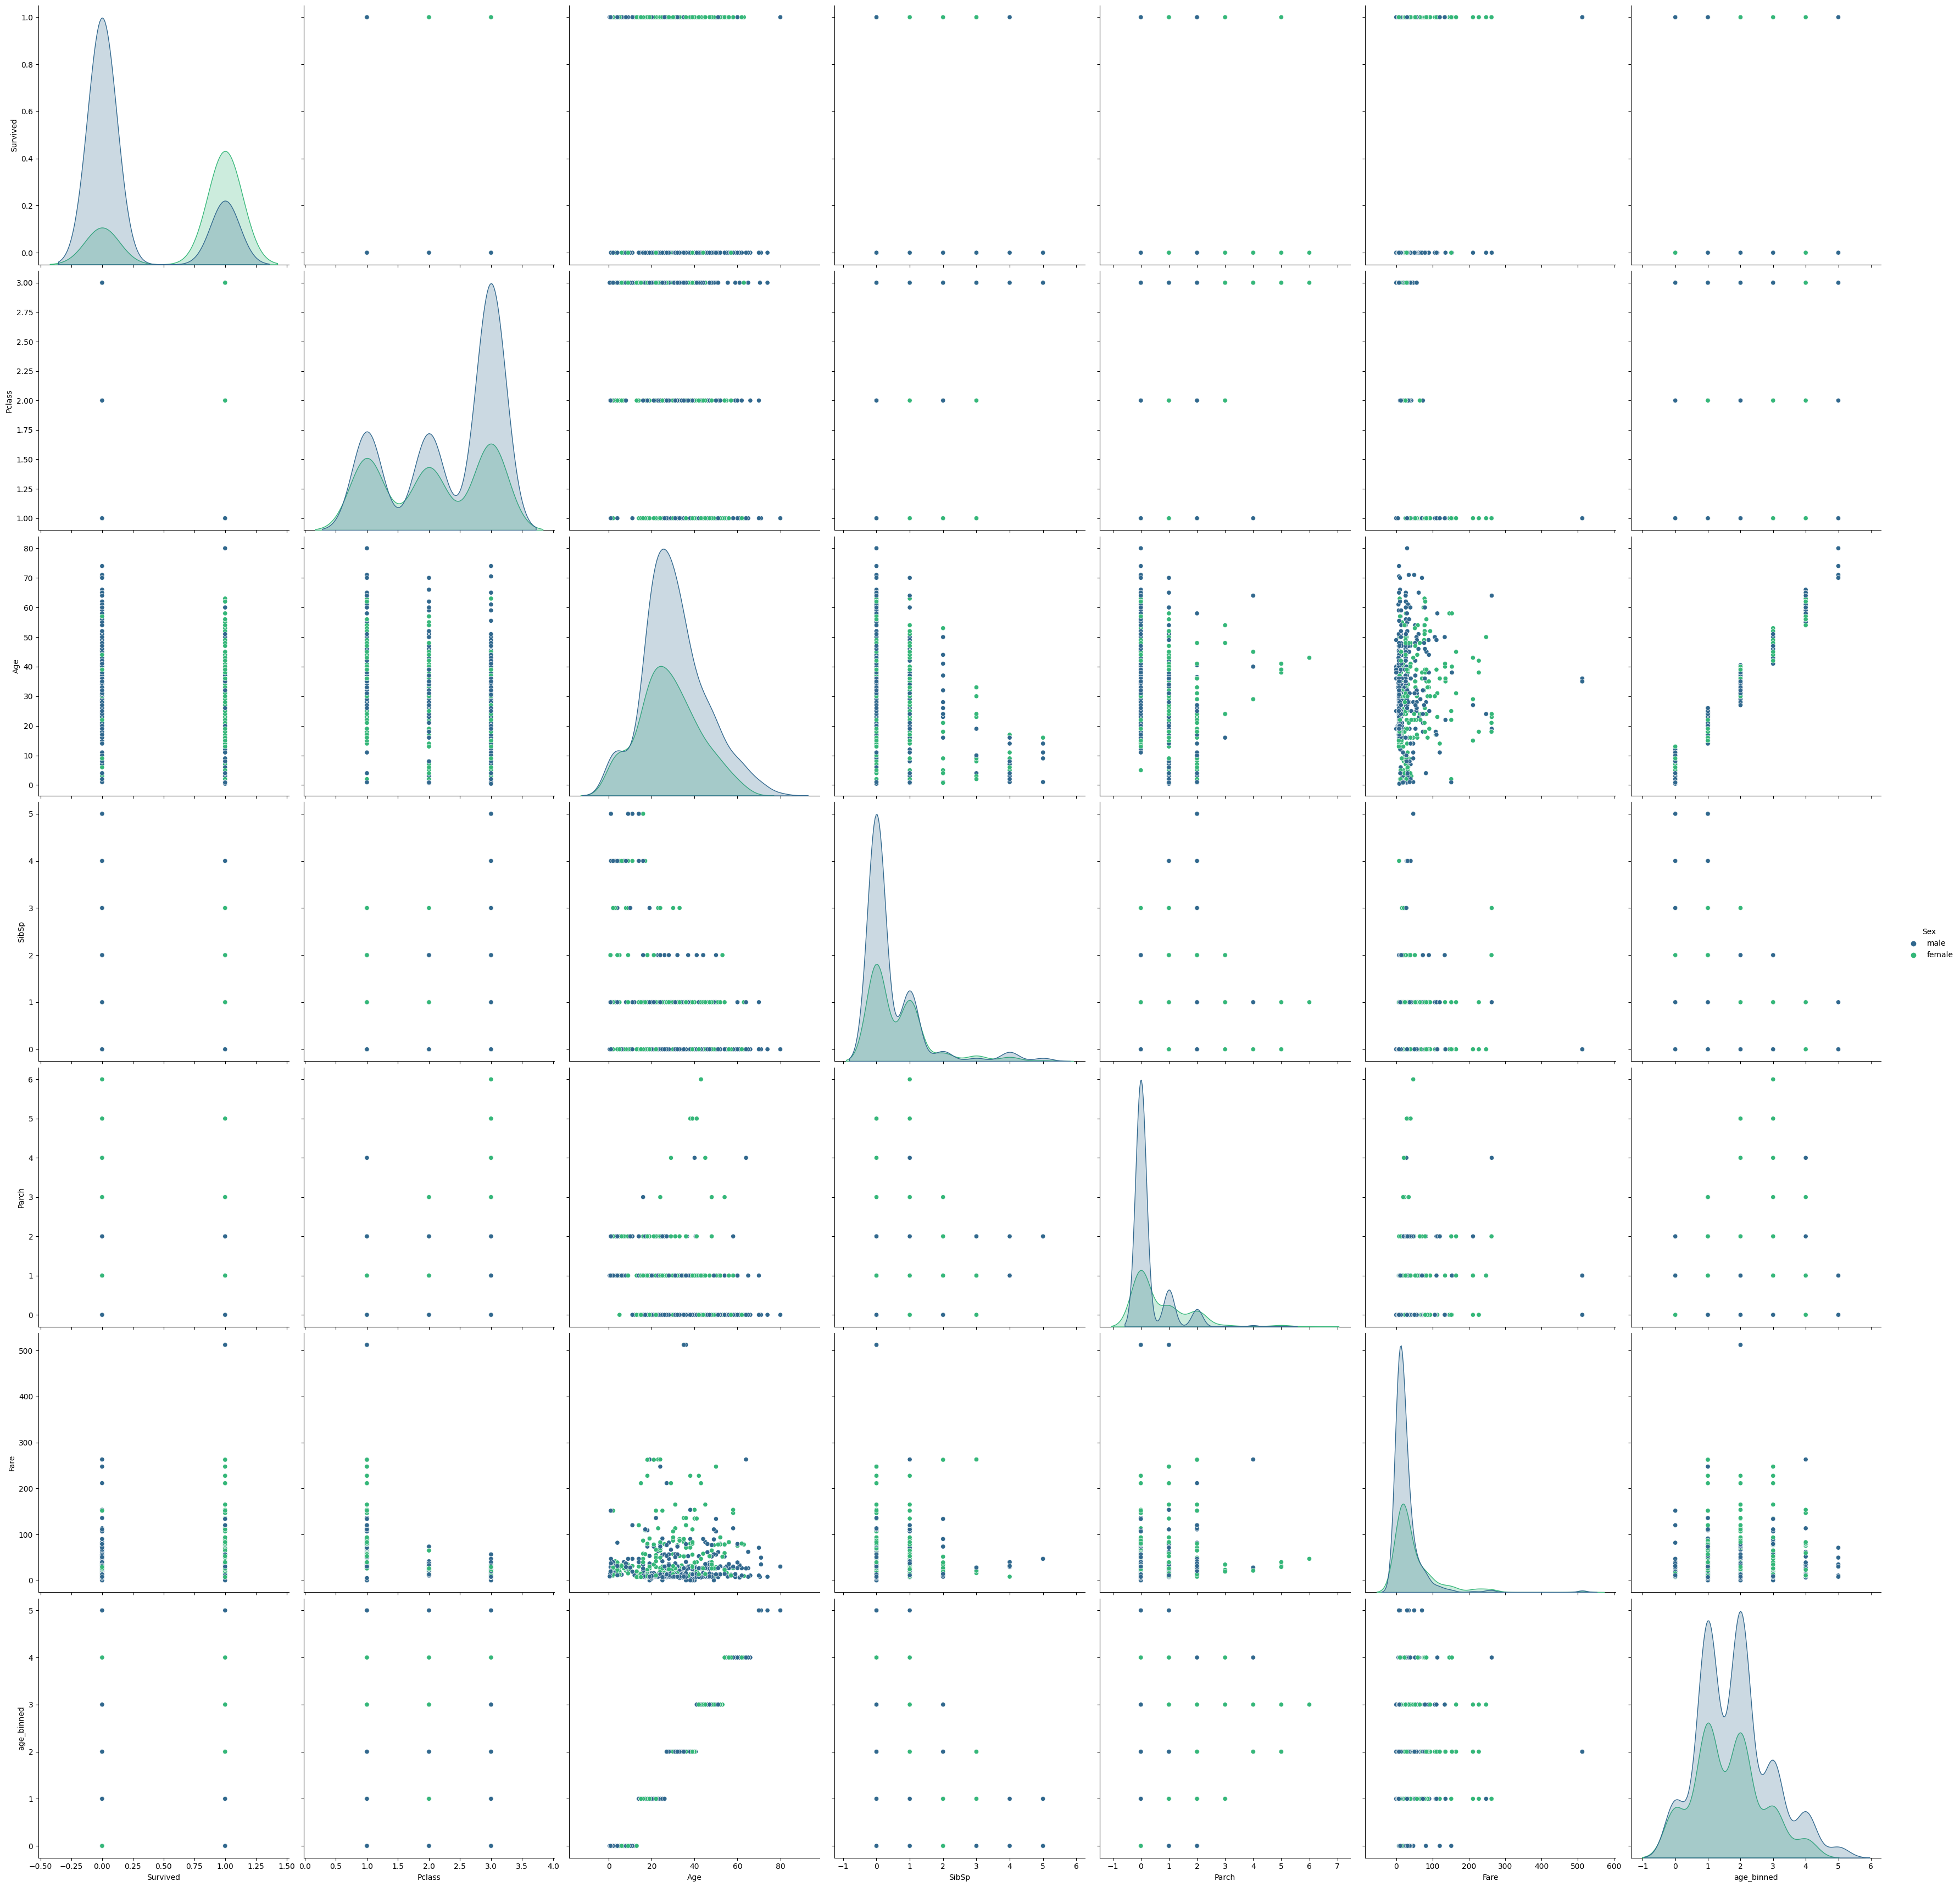

In [36]:
#sns.pairplot(data=df_preprocessed, hue='Sex', palette='viridis', height=5, aspect=1)
#plt.show()

## Preprocess Data